<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Robust-stability" data-toc-modified-id="Robust-stability-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Robust stability</a></span><ul class="toc-item"><li><span><a href="#Admittance-controller" data-toc-modified-id="Admittance-controller-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Admittance controller</a></span></li><li><span><a href="#PI-controller" data-toc-modified-id="PI-controller-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>PI controller</a></span></li><li><span><a href="#Is-passivity-achievable?" data-toc-modified-id="Is-passivity-achievable?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Is passivity achievable?</a></span></li><li><span><a href="#Another-(failed)-attempt" data-toc-modified-id="Another-(failed)-attempt-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Another (failed) attempt</a></span></li></ul></li><li><span><a href="#Controller-Synthesis-with-Passivity-Constraints" data-toc-modified-id="Controller-Synthesis-with-Passivity-Constraints-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Controller Synthesis with Passivity Constraints</a></span></li></ul></div>

This note investigates the limit a LTI controller can achieve in term of maximizing its robustness w.r.t to an exogeneous environment with widely varying stiffness.
Here, the exogeneous agent can be the free-space, or a very stiff table surface. 

Remark that if a system has passive closed-loop dynamics, then no
matter what environment is, as long as it is passive, the closed-loop
dynamics is stable. From this perscpective, the objective of this note can be: 
what is the **limits of passivity** of a system if it is controlled by a LTI controller?

Passivity, however, is not easy to achieve. For instance, even with a small
time-delay, passivity would be lost at higher frequencies, at a phase lag
that is greater than  $\pi/2$ can be found.
This fact can be seen by noting the following mathematical result, this version
given by Slotine in (Slotine, p 137)

\begin{theorem}\label{theo:fdsa}
  A strictly stable linear SISO system is passive iff
  \[\forall \omega \geq 0, \mathrm{Re}(h(j\omega)) \geq 0\]
\end{theorem}

Geometrically, this implies that the Nyquist plot lies entirely in the right-half
plane, an impossible condition if there are even a small time-delay in the control
system.



## Robust stability

Since passivity can be interpreted as the capability to remain stable regardless of the
interconnected exogeneous system. The only condition is that the exogeneous
system is passive. We can perharps formulate a  milder version of passivity
as robust stability: the closed-loop system should remain stable given that the exogeneous
system lies in a set of possible value. We will now investigate the stability 
of systems at different gain value. In particular, we will look at the Nyquist plot and see
how it changes at different gain levels.

As a running example, we consider an industrial robot doing assembly with two possible 
exogeneous systems: the free system (zero gain) and the in-contact system 
(very high gain, approximately 100000 N / m). 

<img src="img1.jpg" alt="Drawing" style="width: 400px;">

\[
R(s) = \frac{1}{1 + 0.0437 s} \frac{55.56 - s}{55.56 + s}s 
\]
and 
\[
A(s) = \frac{1}{6s^2 + 18s + 15 }
\]

The exogeneous system $H(s)$ is assumed to take the form
\[
H(s) = \frac{K}{s}, K\in [0, 1e5]
\]



In [107]:
import control as co
import numpy as np
import matplotlib.pyplot as plt

In [108]:
s = co.tf([1, 0], [1])
R = 1 / (1 + 0.0437 * s) * (55.56 - s) / (55.56 + s) * s

### Admittance controller
We first consider the admittance controller
\[
A(s) = \frac{1}{6s^2 + 18s + 15 }
\]


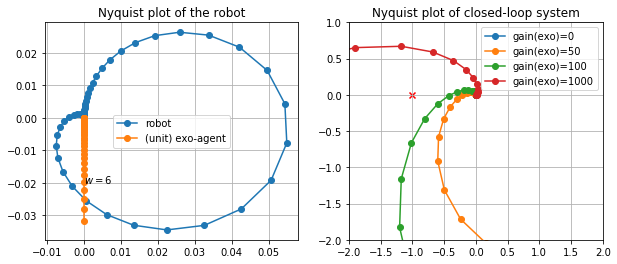

In [112]:
fig, axs = plt.subplots(1, 2, figsize=[10, 4])
A = 1 / (6 * s**2 + 18 * s + 15)
for H in [0, 50, 100, 1000]:
    # Loop gain
    L = R * A * H / s
    # nyquist plot
    mag, phase, omega = L.freqresp(np.logspace(-2, 2))
    nyquist = mag * (np.cos(phase) + 1j * np.sin(phase))
    nyquist = nyquist.flatten()
    plt.plot(nyquist.real, nyquist.imag, '-o', label='gain(exo)={:}'.format(H))
plt.scatter([-1], [0], marker='x', c='red')
plt.xlim(-2, 2)
plt.ylim(-2, 1)
plt.legend()
axs[1].set_title("Nyquist plot of closed-loop system")
plt.grid()

# nyquist plot of the robotic system without human actor
L = R * A
# nyquist plot
mag, phase, omega = L.freqresp(np.logspace(-2, 2))
nyquist = mag * (np.cos(phase) + 1j * np.sin(phase))
nyquist = nyquist.flatten()
axs[0].plot(nyquist.real, nyquist.imag, '-o', label='robot')
mag, phase, omega = (1 / s).freqresp(np.logspace(1.5, 4))
nyquist2 = mag * (np.cos(phase) + 1j * np.sin(phase))
nyquist2 = nyquist2.flatten()
axs[0].plot(nyquist2.real, nyquist2.imag, '-o', label='(unit) exo-agent')
axs[0].text(0, -0.02, "$w=6$")
axs[0].grid()
axs[0].set_title("Nyquist plot of the robot")
axs[0].legend()
plt.show()

We can give the following remarks:
1. It can be seen from the right figure that for relatively high gains (> 500), 
the Nyquist plot of the loop gain easily encircles the -1 point, indicating instability.
This is consistent with experimental results.

2. From the first figuve, we confirm that the robotic system is not passive because
there are points on its Nyquist plot that have negative real parts. Starting from $\omega$
approximately $6 rad/sec$, passivity "is lost".

Is this lost of passivity due to the admittance controller, or rather, no matter what
controller is used, the system would still be passive?

Can we make the system passive?

Before answering both questions, let us consider another controller: the PI controller.

### PI controller
We now consider a simple P controller
\[
A(s) = 0.5
\]


[]
[-77.66477509 -25.28448033   0.        ]
[-115.98354318  -26.58015595    0.        ]
[775.41306849 -28.43338595   0.        ]


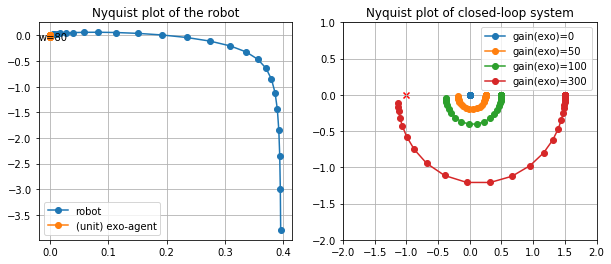

In [184]:
A = 5e-3 * (30 + s)/ (30)
fig, axs = plt.subplots(1, 2, figsize=[10, 4])
for H in [0, 50, 100, 300]:
    # Loop gain
    L = R * A * H / s
    L_cl = co.feedback(1, L, -1)
    print(co.pole(L_cl))
    # nyquist plot
    mag, phase, omega = L.freqresp(np.logspace(-4, 3))
    nyquist = mag * (np.cos(phase) + 1j * np.sin(phase))
    nyquist = nyquist.flatten()
    plt.plot(nyquist.real, nyquist.imag, '-o', label='gain(exo)={:}'.format(H))
plt.scatter([-1], [0], marker='x', c='red')
plt.xlim(-2, 2)
plt.ylim(-2, 1)
plt.legend()
axs[1].set_title("Nyquist plot of closed-loop system")
plt.grid()

# nyquist plot of the robotic system without human actor
L = R * A
# nyquist plot
mag, phase, omega = L.freqresp(np.logspace(-2, 3))
nyquist = mag * (np.cos(phase) + 1j * np.sin(phase))
nyquist = nyquist.flatten()
axs[0].plot(nyquist.real, nyquist.imag, '-o', label='robot')
axs[0].text(-0.02, -0.10, "w=80")
mag, phase, omega = (1 / s).freqresp(np.logspace(1.5, 4))
nyquist2 = mag * (np.cos(phase) + 1j * np.sin(phase))
nyquist2 = nyquist2.flatten()
axs[0].plot(nyquist2.real, nyquist2.imag, '-o', label='(unit) exo-agent')
axs[0].grid()
axs[0].set_title("Nyquist plot of the robot")
axs[0].legend()
plt.show()

- The Nyquist plot shows that the closed-loop system is not passive. After a further thought , this is not
suprise at all. The robot's transfer function has have a phase lag of $-\pi$ at very high frequencies 
(greater than 50).

- However, it is interesting to note that passivity is **lost** only at a higher frequency of 80 rad/sec.
This new value is significantly higher than for the Admittance controller. 

- Since, experimental results also show that PI controller can make contact with a stiff environemtn, unlike
admittance controller. This might
allows us to conclude that "a higher degress of passivity" is more desirable, as it allows
the robot to remain stable w.r.t to a wider range of exogeneous systems.

- But how's passive must the robot be? Using a simple stiffness-only exogenous model, 
\[
\frac{K}{j\omega}
\]
there is a fixed phase lag of $-\pi/2$. Now, at  $\omega=100, K=10000$, gain from the exogeneous
system is $100$, which implies that the crossing-gain must be less than 0.01.

### Is passivity achievable?

From the above two experiments, one might be tempted to make the conclusion that: Passivity is not achievable
if there is time-delay. More specifically, even for this simple robot model, we can't make it 
passive. 

Intuitively, this does not make sense. If such a property is so hard to etablished, ppl would not 
buy it so much, to write many papers on it.

Turn out, it is possible to make a system passive, and it is quite simple: just a lead compensator
would do. Specifcially, consider the below controller:

In [181]:
A = 5e-3 * (30 + s) / 30

The intuition is that: the phase lead allowed by this controller will help to alleviate the phase lag due to 
time-delay, making the Nyquist plot stay completely in the right half-plane.

Let's see its Nyquist plot:

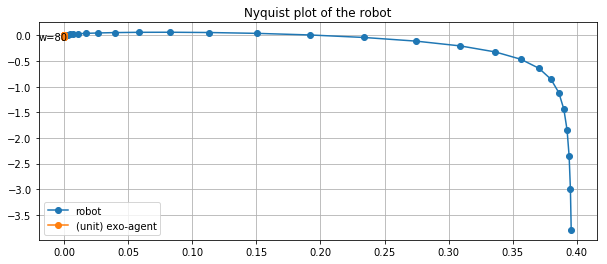

In [182]:
fig, axs = plt.subplots(1, 1, figsize=[10, 4])
# nyquist plot of the robotic system without human actor
L = R * A
# nyquist plot
mag, phase, omega = L.freqresp(np.logspace(-2, 3))
nyquist = mag * (np.cos(phase) + 1j * np.sin(phase))
nyquist = nyquist.flatten()
axs.plot(nyquist.real, nyquist.imag, '-o', label='robot')
axs.text(-0.02, -0.10, "w=80")
mag, phase, omega = (1 / s).freqresp(np.logspace(1.5, 4))
nyquist2 = mag * (np.cos(phase) + 1j * np.sin(phase))
nyquist2 = nyquist2.flatten()
axs.plot(nyquist2.real, nyquist2.imag, '-o', label='(unit) exo-agent')
axs.grid()
axs.set_title("Nyquist plot of the robot")
axs.legend()
plt.show()

Clearly the Nyquist plot stays completely in the right-half plane, and therefore, implying
that the robotic system is passive. However, this is not a good controller design because
the loop gain at high frequencies tend to infinity, leading to bad noise attenuation property.

### Another (failed) attempt
How's about this controller
\[
A = 5\times 10^{-3} (30 + s) / (30 - s)
\]

This controller brings plenty of phase lag to address passivity. At the same time, its magnitude
does not tend to infinity. This is almost too good to be true.

Indeed, some simple testings show that the closed-loop dynamics is unstable. This is because
the controller is not open-loop stable (has a pole at 30). And therefore, 
all argument regarding the Nyquist plot are invalid.

If I use a kind of automatic controller synthesis on the open loop dynamics, at least I can 
be sure that the open loop dynamics is stable. 


## Controller Synthesis with Passivity Constraints

In this section I will try to synthesize a controller that render the closed-loop dynamics when in free-space, 
or more concisely the open-loop dynamics passive. Let's see how it fair.

